In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **DATA PROCESSING**

In [2]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/RS/SpotifyFeatures.csv')

df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

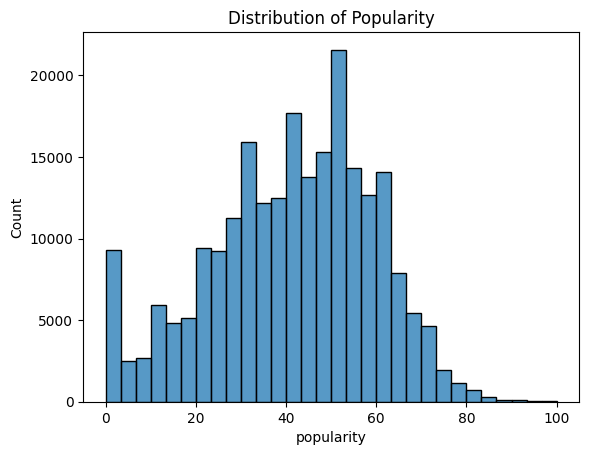

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Distribution of popularity
sns.histplot(df['popularity'], bins=30)
plt.title('Distribution of Popularity')
plt.show()


In [ ]:
missing_tracks = df[df['track_name'].isnull()]
print(missing_tracks)



        genre        artist_name track_name                track_id  \
208285  World  Elevation Worship        NaN  7BGQCe62A58Q5ZgpQFX93t   

        popularity  acousticness  danceability  duration_ms  energy  \
208285          44         0.019         0.287       350027   0.446   

        instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
208285               0.0   F       0.1    -7.214  Major       0.0317  138.727   

       time_signature  valence  
208285            4/4   0.0387  


In [ ]:
df = df.dropna(subset=['track_name'])


In [ ]:
missing_tracks = df[df['track_name'].isnull()]
print(missing_tracks)

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []


In [ ]:
print(df.isnull().sum())  # Check for missing values
print(df.shape)  # Check the number of rows and columns


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
(232724, 18)


In [ ]:
print(df.columns)


Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


RECOMMENDATION

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Select relevant features for similarity calculation
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo', 'valence']

# Subset data for testing
X = df_subset[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute cosine similarity
cosine_sim = cosine_similarity(X_scaled)


In [ ]:
def get_song_recommendations(song_name, cosine_sim, df):
    # Get the index of the song that matches the name
    idx = df[df['track_name'] == song_name].index[0]

    # Get the pairwise similarity scores for all songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar songs (excluding the song itself)
    sim_scores = sim_scores[1:11]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    return df['track_name'].iloc[song_indices]


In [ ]:
print(df['track_name'].head(20))  # Show the first 20 song names


0                           C'est beau de faire un Show
1                      Perdu d'avance (par Gad Elmaleh)
2                        Don't Let Me Be Lonely Tonight
3                        Dis-moi Monsieur Gordon Cooper
4                                             Ouverture
5                        Le petit souper aux chandelles
6     Premières recherches (par Paul Ventimila, Lori...
7                                         Let Me Let Go
8                                                 Helka
9                             Les bisous des bisounours
10    Symphony No.4 In E Minor Op.98 : IV. Allegro E...
11    The Hanging (Maverick - Original Motion Pictur...
12                               J'ai demandé à la lune
13                                        Mangala Aarti
14                                         Keys of Love
15         Les aventures d'Arsène Lupin: 813 - Partie 6
16                                                Diane
17                                         Ultra

In [ ]:
song_name = 'Veunise'  # Replace with any song name from your dataset
recommendations = get_song_recommendations(song_name, cosine_sim, df)
print(f"Recommendations for '{song_name}':")
print(recommendations)


Recommendations for 'Veunise':
107                                    Choices
565                  In the Still of the Night
94     Grosse Fille Ne Pleure Pas - Remastered
219                             Forever Always
164                         Wus Good / Curious
977                         Somebody's Chelsea
883                         Run With the Devil
368                                    Parodos
567    December Song [Bonus Track] - A Capella
951                                  Love Song
Name: track_name, dtype: object


**PLAYLIST**


**UI**

In [ ]:
import pandas as pd
import unicodedata
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Function to normalize song names (remove accents and special characters)
def normalize_text(text):
    if isinstance(text, str):  # Check if the text is a string
        return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII').strip().lower()
    return ""  # Return empty string if it's not a valid string (e.g., NaN or float)

# Take a subset of the top 1000 songs
df_subset = df.head(1000).copy()  # Make a copy to avoid SettingWithCopyWarning

# Add normalized track name for comparison
df_subset['normalized_track_name'] = df_subset['track_name'].apply(normalize_text)

# Select relevant features for similarity calculation
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
            'loudness', 'speechiness', 'tempo', 'valence']

# Subset data for testing
X = df_subset[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute cosine similarity
cosine_sim = cosine_similarity(X_scaled)

# Function to generate playlist recommendations based on song name
def generate_playlist(song_name, cosine_sim, df, top_n=10):
    # Normalize the song name
    normalized_song_name = normalize_text(song_name)

    if normalized_song_name in df['normalized_track_name'].values:
        song_idx = df[df['normalized_track_name'] == normalized_song_name].index[0]

        # Get the cosine similarity for the song
        sim_scores = list(enumerate(cosine_sim[song_idx]))

        # Sort the songs based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top n songs
        top_songs = [i[0] for i in sim_scores[1:top_n+1]]  # Exclude the song itself

        # Return the top recommended songs
        recommended_tracks = df.iloc[top_songs][['track_name', 'artist_name']]
        return recommended_tracks
    else:
        return "Song not found in dataset."

# Example usage:
song_name = 'Veunise'  # Replace with the song you want recommendations for
playlist = generate_playlist(song_name, cosine_sim, df_subset, top_n=10)
print(f"Generated Playlist for '{song_name}':")
print(playlist)


Generated Playlist for 'Veunise':
                                  track_name       artist_name
107                                  Choices       Larry Groce
565                In the Still of the Night    MC6 A Cappella
94   Grosse Fille Ne Pleure Pas - Remastered    Henri Salvador
219                           Forever Always  Peter CottonTale
164                       Wus Good / Curious     PARTYNEXTDOOR
977                       Somebody's Chelsea     Reba McEntire
883                       Run With the Devil         Bart Crow
368                                  Parodos            Chorus
567  December Song [Bonus Track] - A Capella     Peter Hollens
951                                Love Song   Miranda Lambert


In [4]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import unicodedata
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import gradio as gr

# Function to normalize song names
def normalize_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII').strip().lower()
    return ""

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/RS/SpotifyFeatures.csv")

# Take Top 1000 songs
df_subset = df.head(1000)

# Normalize track names
df_subset['normalized_track_name'] = df_subset['track_name'].apply(normalize_text)

# Features for recommendation
features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]
X = df_subset[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate cosine similarity
cosine_sim = cosine_similarity(X_scaled)

# Recommendation function
def generate_playlist(song_name, cosine_sim, df, top_n=10):
    normalized_song_name = normalize_text(song_name)
    if normalized_song_name in df['normalized_track_name'].values:
        song_idx = df[df['normalized_track_name'] == normalized_song_name].index[0]
        sim_scores = list(enumerate(cosine_sim[song_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_songs = [i[0] for i in sim_scores[1:top_n+1]]
        recommended_tracks = df.iloc[top_songs][['track_name', 'artist_name']]
        return recommended_tracks
    else:
        return "Song not found in dataset."

# Gradio interface function
def gradio_interface(song_name):
    recommendations = generate_playlist(song_name, cosine_sim, df_subset, top_n=10)
    if isinstance(recommendations, str):
        return recommendations
    return recommendations.to_string(index=False)

# Custom CSS for background
custom_css = """
.gradio-container {
    background-color: #F8C8DC
}
"""

# Gradio Interface
interface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter a Song Name"),
    outputs=gr.Textbox(label="Recommended Songs"),
    title="MelodyMate 🎶",
    description="Enter a song name to get song recommendations based on musical features!",
    css=custom_css
)

# Launch the app
interface.launch()


<ipython-input-5-66d617675cf4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['normalized_track_name'] = df_subset['track_name'].apply(normalize_text)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28511bc3a833567506.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
